# Practica 4

In [63]:
from pytket import Circuit
from pytket.extensions.qiskit import AerBackend
from pytket.circuit.display import render_circuit_jupyter

## Ejercicio 1

In [64]:
c = Circuit(1,1).H(0).measure_all()
render_circuit_jupyter(c)

In [66]:
backend = AerBackend()
c = backend.get_compiled_circuit(c)
handle = backend.process_circuit(c, n_shots=1000)
counts = backend.get_result(handle).get_counts()
print(counts)

Counter({(1,): 522, (0,): 478})


En el resultado podemos ver como se reparte aleatoriamente la cantidad de datos en cada estado.

## Ejercicio 2

In [67]:
oracle = ['00','01','10','11']

for orac in oracle:
	c = Circuit(2,1)
	c.X(1).H(0).H(1)
	
	if orac == '00':
		c
	if orac == '01':
		c.CX(0,1)
	if orac == '10':
		c.CX(0,1).X(1)
	if orac == '11':
		c.CX(0,1).X(1).CX(0,1)

	c.H(0)
	# c.Measure(0, 0)
	c.measure_all()

	render_circuit_jupyter(c)

	backend = AerBackend()
	c = backend.get_compiled_circuit(c)
	handle = backend.process_circuit(c, n_shots=1000)
	counts = backend.get_result(handle).get_counts()
	print(counts)

Counter({(0, 1): 523, (0, 0): 477})


Counter({(1, 1): 507, (1, 0): 493})


Counter({(1, 1): 520, (1, 0): 480})


Counter({(0, 0): 501, (0, 1): 499})


## Ejercicio 3

### 3 qubits

In [68]:
oracle = ['000','111','101','001']

for orac in oracle:
	c = Circuit(3,2)
	c.X(2).H(0).H(1).H(2)
	
	if orac == '000':
		c
	if orac == '111':
		c.CX(0,2).X(0).CX(0,2).CX(1,2).X(1).CX(1,2)
	if orac == '101':
		c.CX(0,2).CX(1,2)
	if orac == '001':
		c.CX(1,2).CCX(0,1,2)

	c.H(0).H(1)

	# c.Measure(0, 0)
	# c.Measure(1, 1)
	c.measure_all()

	render_circuit_jupyter(c)
	
	backend = AerBackend()
	c = backend.get_compiled_circuit(c)
	handle = backend.process_circuit(c, n_shots=1000)
	counts = backend.get_result(handle).get_counts()
	print(counts)

Counter({(0, 0, 1): 501, (0, 0, 0): 499})


Counter({(0, 0, 1): 512, (0, 0, 0): 488})


Counter({(1, 1, 1): 513, (1, 1, 0): 487})


Counter({(0, 1, 0): 145, (0, 0, 0): 131, (0, 0, 1): 129, (1, 1, 0): 127, (0, 1, 1): 120, (1, 0, 1): 118, (1, 1, 1): 116, (1, 0, 0): 114})


### 4 qubits

In [70]:
oracle = ['000','111','101','001']

for orac in oracle:
	c = Circuit(4,3)
	c.X(3).H(0).H(1).H(2).H(3)
	
	if orac == '000':
		c
	if orac == '111':
		c.CX(0,3).X(0).CX(0,3).CX(1,3).X(1).CX(1,3).CX(2,3).X(2).CX(2,3)
	if orac == '101':
		c.CX(0,3).CX(1,3).CX(2,3)
	if orac == '001':
		c.CX(2,3).CX(1,3).CCX(0,1,3)

	c.H(0).H(1).H(2)

	# c.Measure(0, 0)
	# c.Measure(1, 1)
	# c.Measure(2, 2)
	c.measure_all()
	
	render_circuit_jupyter(c)

	backend = AerBackend()
	c = backend.get_compiled_circuit(c)
	handle = backend.process_circuit(c, n_shots=1000)
	counts = backend.get_result(handle).get_counts()
	print(counts)

Counter({(0, 0, 0, 0): 504, (0, 0, 0, 1): 496})


Counter({(0, 0, 0, 0): 519, (0, 0, 0, 1): 481})


Counter({(1, 1, 1, 0): 503, (1, 1, 1, 1): 497})


Counter({(0, 0, 1, 1): 137, (1, 1, 1, 0): 129, (0, 1, 1, 1): 126, (0, 0, 1, 0): 125, (0, 1, 1, 0): 124, (1, 0, 1, 0): 124, (1, 1, 1, 1): 124, (1, 0, 1, 1): 111})


## Ejercicio 4

### IBM

In [21]:
# Cargamos las credenciales de IBMQ
from qiskit import IBMQ

with open('qiskit.txt', 'r') as file:
	token = file.read()

# IBMQ.save_account(token, hub='ibm-q-education', group='uni-complutense-2', project='architecture-pro', overwrite=True)
IBMQ.save_account(token, overwrite=True)

In [34]:
from qiskit import QuantumCircuit, Aer, transpile, QuantumRegister, ClassicalRegister
from qiskit import execute
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

from math import pi

#### 3 qubits

In [38]:
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and not b.configuration().simulator and b.status().operational==True))

oracle = ['00','01','10','11']

for orac in oracle:
	q = QuantumRegister(3,'q')
	c = ClassicalRegister(3,'c')
	
	circuit = QuantumCircuit(q, c)
	circuit.x(q[2])
	circuit.h(q[0])
	circuit.h(q[1])
	circuit.h(q[2])
	
	if orac == '00':
		circuit
	if orac == '01':
		circuit.cx(q[0],q[2])
		circuit.x(q[0])
		circuit.cx(q[0],q[2])
		circuit.cx(q[1],q[2])
		circuit.x(q[1])
		circuit.cx(q[1],q[2])
	if orac == '10':
		circuit.cx(q[0],q[2])
		circuit.cx(q[1],q[2])
	if orac == '11':
		circuit.cx(q[1],q[2])
		circuit.ccx(q[0],q[1],q[2])
		
	circuit.h(q[0])
	circuit.h(q[1])

	circuit.measure([0,1], [0,1])

	transp_circuit = transpile(circuit, backend=backend)
	job = backend.run(transp_circuit)
	retrieved_job = backend.retrieve_job(job.job_id())
	result = retrieved_job.result()
	counts = result.get_counts(circuit)
	print("\nNúmero de ocurrencias para 0 y 1:",counts)
	print(circuit)

ibmqfactory.load_account:WARNING:2022-04-13 16:50:14,311: Credentials are already in use. The existing account in the session will be replaced.



Número de ocurrencias para 0 y 1: {'000': 3921, '001': 53, '010': 26}
     ┌───┐┌───┐┌─┐   
q_0: ┤ H ├┤ H ├┤M├───
     ├───┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ H ├─╫─┤M├
     ├───┤├───┤ ║ └╥┘
q_2: ┤ X ├┤ H ├─╫──╫─
     └───┘└───┘ ║  ║ 
c: 3/═══════════╩══╩═
                0  1 

Número de ocurrencias para 0 y 1: {'000': 3549, '001': 231, '010': 203, '011': 17}
     ┌───┐          ┌───┐     ┌───┐     ┌─┐             
q_0: ┤ H ├───────■──┤ X ├──■──┤ H ├─────┤M├─────────────
     ├───┤       │  └───┘  │  └───┘┌───┐└╥┘     ┌───┐┌─┐
q_1: ┤ H ├───────┼─────────┼────■──┤ X ├─╫───■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐     ┌─┴─┐┌─┴─┐└───┘ ║ ┌─┴─┐└───┘└╥┘
q_2: ┤ X ├┤ H ├┤ X ├─────┤ X ├┤ X ├──────╫─┤ X ├──────╫─
     └───┘└───┘└───┘     └───┘└───┘      ║ └───┘      ║ 
c: 3/════════════════════════════════════╩════════════╩═
                                         0            1 

Número de ocurrencias para 0 y 1: {'000': 61, '001': 227, '010': 252, '011': 3460}
     ┌───┐          ┌───┐     ┌─┐   
q_0: ┤ H ├───

#### 4 qubits

In [49]:
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and not b.configuration().simulator and b.status().operational==True))

oracle = ['00','01','10','11']

for orac in oracle:
	circuit = QuantumCircuit(4,3)
	circuit.x(3)
	circuit.h(0)
	circuit.h(1)
	circuit.h(2)
	circuit.h(3)
	
	if orac == '00':
		circuit
	if orac == '01':
		circuit.cx(0,3)
		circuit.x(0)
		circuit.cx(0,3)
		circuit.cx(1,3)
		circuit.x(1)
		circuit.cx(1,3)
		circuit.cx(2,3)
		circuit.x(2)
		circuit.cx(2,3)
	if orac == '10':
		circuit.cx(0,3)
		circuit.cx(1,3)
		circuit.cx(2,3)
	if orac == '11':
		circuit.cx(2,3)
		circuit.cx(1,3)
		circuit.ccx(0,1,3)
		
	circuit.h(0)
	circuit.h(1)
	circuit.h(2)

	circuit.measure([0,1,2], [0,1,2])

	transp_circuit = transpile(circuit, backend=backend)
	job = backend.run(transp_circuit)
	retrieved_job = backend.retrieve_job(job.job_id())
	result = retrieved_job.result()
	counts = result.get_counts(circuit)
	print("\nNúmero de ocurrencias para 0 y 1:",counts)
	print(circuit)

ibmqfactory.load_account:WARNING:2022-04-13 17:57:20,534: Credentials are already in use. The existing account in the session will be replaced.



Número de ocurrencias para 0 y 1: {'000': 3840, '001': 55, '010': 65, '100': 38, '101': 2}
     ┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2 

Número de ocurrencias para 0 y 1: {'000': 2582, '001': 306, '010': 219, '011': 137, '100': 590, '101': 82, '110': 63, '111': 21}
     ┌───┐          ┌───┐     ┌───┐     ┌─┐                               
q_0: ┤ H ├───────■──┤ X ├──■──┤ H ├─────┤M├───────────────────────────────
     ├───┤       │  └───┘  │  └───┘┌───┐└╥┘     ┌───┐     ┌─┐             
q_1: ┤ H ├───────┼─────────┼────■──┤ X ├─╫───■──┤ H ├─────┤M├─────────────
     ├───┤       │         │    │  └───┘ ║   │  └───┘┌───┐└╥┘     ┌───┐┌─┐
q_2: ┤ H ├───────┼─────────┼────┼────────╫───┼────■──┤ X ├─╫───■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐     ┌─┴─┐┌─┴─┐      ║ ┌─┴─┐┌─┴─┐

### IonQ

In [51]:
from braket.circuits import Circuit
from braket.aws import AwsDevice
import matplotlib.pyplot as plt

In [52]:
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/IONQ")

#### 3 qubits

T  : |0|1|
          
q0 : -H-H-
          
q1 : -H-H-
          
q2 : -X-H-

T  : |0|1|
Resultados:  Counter({'001': 524, '000': 462, '100': 6, '101': 5, '011': 2, '010': 1})
T  : |0|1|2|3|4|5|6|7|8|
                        
q0 : -H---C-X-C-H-------
          |   |         
q1 : -H---|---|-C-X-C-H-
          |   | |   |   
q2 : -X-H-X---X-X---X---

T  : |0|1|2|3|4|5|6|7|8|
Resultados:  Counter({'001': 491, '000': 441, '100': 23, '011': 18, '101': 17, '010': 9, '110': 1})
T  : |0|1|2|3|4|
                
q0 : -H---C-H---
          |     
q1 : -H---|-C-H-
          | |   
q2 : -X-H-X-X---

T  : |0|1|2|3|4|
Resultados:  Counter({'110': 482, '111': 444, '100': 21, '101': 21, '011': 13, '010': 13, '001': 6})
T  : |0|1|
          
q0 : -H-H-
          
q1 : -H-H-
          
q2 : -X-H-

T  : |0|1|
Resultados:  Counter({'001': 504, '000': 481, '100': 6, '101': 6, '011': 2, '010': 1})


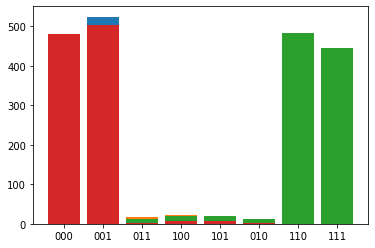

In [58]:
oracle = {
			"00": Circuit(),
			"01": Circuit().cnot(0,2).x(0).cnot(0,2).cnot(1,2).x(1).cnot(1,2),
			"10": Circuit().cnot(0,2).cnot(1,2),
			"11": Circuit()
		  }

for orac in oracle:
	circ = Circuit().x(2).h(0).h(1).h(2).add_circuit(oracle[orac]).h([0]).h([1])
	
	print(circ)
	task = device.run(circ, s3_folder).result().measurement_counts
	print("Resultados: ", task)

	plt.bar(task.keys(), task.values())

#### 4 qubits

T  : |0|1|
          
q0 : -H-H-
          
q1 : -H-H-
          
q2 : -H-H-
          
q3 : -X-H-

T  : |0|1|
Resultados:  Counter({'0001': 487, '0000': 402, '0011': 52, '0010': 45, '1001': 3, '1000': 3, '0100': 2, '1010': 2, '1111': 1, '1011': 1, '0111': 1, '0101': 1})
T  : |0|1|2|3|4|5|6|7|8|9|10|11|
                                
q0 : -H---C-X-C-H---------------
          |   |                 
q1 : -H---|---|-C-X-C-H---------
          |   | |   |           
q2 : -H---|---|-|---|-C-X-C--H--
          |   | |   | |   |     
q3 : -X-H-X---X-X---X-X---X-----

T  : |0|1|2|3|4|5|6|7|8|9|10|11|
Resultados:  Counter({'0001': 440, '0000': 311, '0101': 95, '0100': 33, '0011': 27, '0010': 27, '1000': 25, '1001': 17, '0111': 13, '0110': 5, '1101': 4, '1011': 1, '1100': 1, '1110': 1})
T  : |0|1|2|3|4|5|
                  
q0 : -H---C-H-----
          |       
q1 : -H---|-C-H---
          | |     
q2 : -H---|-|-C-H-
          | | |   
q3 : -X-H-X-X-X---

T  : |0|1|2|3|4|5|
Resultados:  Count

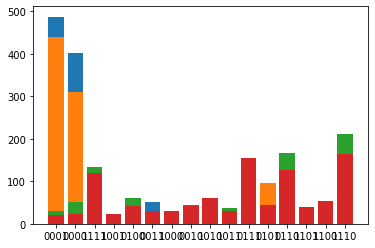

In [62]:
def controlled_rotation(t,c,theta):
    circ = Circuit().rz(t,theta/2).cnot(c,t).rz(t,-theta/2).cnot(c,t)
    return circ

def ccnot(a,b,t,theta):
    circ = Circuit()
    circ.add_circuit(controlled_rotation(t,b,theta)).cnot(a,b).add_circuit(controlled_rotation(t,b,-theta)).cnot(a,b).add_circuit(controlled_rotation(t,a,theta))
    return circ

oracle = {
			"00": Circuit(),
			"01": Circuit().cnot(0,3).x(0).cnot(0,3).cnot(1,3).x(1).cnot(1,3).cnot(2,3).x(2).cnot(2,3),
			"10": Circuit().cnot(0,3).cnot(1,3).cnot(2,3),
			"11": Circuit().cnot(2,3).cnot(1,3).add_circuit(ccnot(0,1,3,1))
         }

for orac in oracle:
	circ = Circuit().x(3).h(0).h(1).h(2).h(3).add_circuit(oracle[orac]).h(0).h(1).h(2)
	
	print(circ)
	task = device.run(circ, s3_folder).result().measurement_counts
	print("Resultados: ", task)

	plt.bar(task.keys(), task.values())

### Rigetti

In [54]:
from braket.circuits import Circuit
from braket.aws import AwsDevice
import matplotlib.pyplot as plt

In [55]:
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/RIGETTI")

#### 3 qubits

     ┌───┐                         ┌───┐┌─┐   
q_0: ┤ H ├──────────────────────■──┤ H ├┤M├───
     ├───┤                      │  ├───┤└╥┘┌─┐
q_1: ┤ H ├────────────■─────────■──┤ H ├─╫─┤M├
     ├───┤            │  ┌───┐  │  └┬─┬┘ ║ └╥┘
q_2: ┤ H ├───────■────┼──┤ H ├──┼───┤M├──╫──╫─
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘┌─┴─┐ └╥┘  ║  ║ 
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├─────┤ X ├──╫───╫──╫─
     └───┘└───┘└───┘└───┘     └───┘  ║   ║  ║ 
c: 3/════════════════════════════════╩═══╩══╩═
                                     2   0  1 
Resultados:  Counter({'001': 496, '000': 485, '100': 9, '101': 5, '011': 3, '010': 2})
     ┌───┐                         ┌───┐┌─┐   
q_0: ┤ H ├──────────────────────■──┤ H ├┤M├───
     ├───┤                      │  ├───┤└╥┘┌─┐
q_1: ┤ H ├────────────■─────────■──┤ H ├─╫─┤M├
     ├───┤            │  ┌───┐  │  └┬─┬┘ ║ └╥┘
q_2: ┤ H ├───────■────┼──┤ H ├──┼───┤M├──╫──╫─
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘┌─┴─┐ └╥┘  ║  ║ 
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├─────┤ X ├──╫───╫──╫─
     └───┘└───┘└───┘

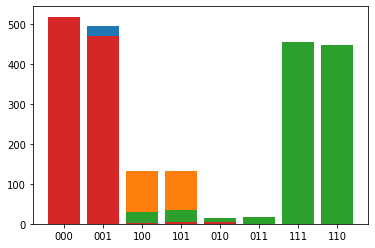

In [56]:
oracle = {
			"00": Circuit(),
			"01": Circuit().cnot(0,2).x(0).cnot(0,2).cnot(1,2).x(1).cnot(1,2),
			"10": Circuit().cnot(0,2).cnot(1,2),
			"11": Circuit()
		  }

for orac in oracle:
	circ = Circuit().x(2).h(0).h(1).h(2).add_circuit(oracle[orac]).h([0]).h([1])
	
	print(circuit)
	task = device.run(circ, s3_folder).result().measurement_counts
	print("Resultados: ", task)

	plt.bar(task.keys(), task.values())

#### 4 qubits

     ┌───┐                         ┌───┐┌─┐   
q_0: ┤ H ├──────────────────────■──┤ H ├┤M├───
     ├───┤                      │  ├───┤└╥┘┌─┐
q_1: ┤ H ├────────────■─────────■──┤ H ├─╫─┤M├
     ├───┤            │  ┌───┐  │  └┬─┬┘ ║ └╥┘
q_2: ┤ H ├───────■────┼──┤ H ├──┼───┤M├──╫──╫─
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘┌─┴─┐ └╥┘  ║  ║ 
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├─────┤ X ├──╫───╫──╫─
     └───┘└───┘└───┘└───┘     └───┘  ║   ║  ║ 
c: 3/════════════════════════════════╩═══╩══╩═
                                     2   0  1 
Resultados:  Counter({'0001': 469, '0000': 463, '1001': 21, '1000': 19, '0011': 14, '0010': 10, '0100': 2, '1011': 1, '0101': 1})
     ┌───┐                         ┌───┐┌─┐   
q_0: ┤ H ├──────────────────────■──┤ H ├┤M├───
     ├───┤                      │  ├───┤└╥┘┌─┐
q_1: ┤ H ├────────────■─────────■──┤ H ├─╫─┤M├
     ├───┤            │  ┌───┐  │  └┬─┬┘ ║ └╥┘
q_2: ┤ H ├───────■────┼──┤ H ├──┼───┤M├──╫──╫─
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘┌─┴─┐ └╥┘  ║  ║ 
q_3: ┤ X ├┤ H ├┤ X ├┤ X 

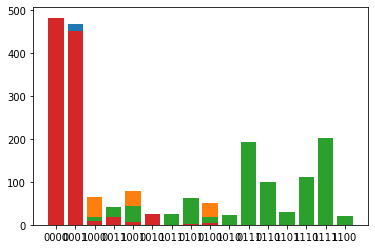

In [57]:
oraculo = {
			"00": Circuit(),
			"01": Circuit().cnot(0,3).x(0).cnot(0,3).cnot(1,3).x(1).cnot(1,3).cnot(2,3).x(2).cnot(2,3),
			"10": Circuit().cnot(0,3).cnot(1,3).cnot(2,3),
			"11": Circuit()
		  }

for orac in oracle:
	circ = Circuit().x(3).h(0).h(1).h(2).h(3).add_circuit(oraculo[orac]).h(0).h(1).h(2)
	
	print(circuit)
	task = device.run(circ, s3_folder).result().measurement_counts
	print("Resultados: ", task)

	plt.bar(task.keys(), task.values())